In [21]:
import requests
from lxml import html
import os
import sys
import logging 
import shutil 
import zipfile
import httplib2
from bs4 import BeautifulSoup, SoupStrainer
import logging 
import pandas as pd
import glob
import numpy as np
import csv
import requests

In [15]:
files = glob.glob('Sample_zipfiles' + '/sample_orig*.txt' )
for f in files:
    print(f[16:32])

sample_orig_2005
sample_orig_2006
sample_orig_2007
sample_orig_2008
sample_orig_2009
sample_orig_2010
sample_orig_2011
sample_orig_2012
sample_orig_2013
sample_orig_2014
sample_orig_2015
sample_orig_2016


In [44]:

def dataCleaning_sample_origination(year):
    files = 'Sample_zipfiles/sample_orig_'+ str(year) + '.txt'
    
    if not os.path.exists('Sample_origin_clean'):
        os.makedirs('Sample_origin_clean', mode=0o777, exist_ok=False)
        
    data_1 = pd.read_csv(files,sep="|", header = None,low_memory=False)

    data_1.columns = ['fico','dt_first_pi','flag_fthb','dt_matr','cd_msa',"mi_pct",'cnt_units',
                      'occpy_sts','cltv','dti','orig_upb','ltv','int_rt','channel','ppmt_pnlty',
                      'prod_type','st', 'prop_type','zipcode','id_loan','loan_purpose', 
                      'orig_loan_term','cnt_borr','seller_name','servicer_name', 'flag_sc']

    data_1.fico = data_1.fico.replace(r'\s+', np.nan, regex=True).astype('float64')
    data_1.update(data_1[['fico']].fillna(data_1['fico'].mode()[0]))


    data_1.flag_fthb = data_1.flag_fthb.replace(r'\s+', np.nan, regex=True)
    data_1['flag_fthb'] = (data_1[['flag_fthb']].fillna(3))
    data_1.flag_fthb.replace('N', 0 , inplace = True)
    data_1.flag_fthb.replace('Y', 0 , inplace = True)
    data_1.flag_fthb = data_1.flag_fthb.astype('category')

    data_1.mi_pct = data_1.mi_pct.replace(r'\s+', np.nan, regex=True)
    data_1.mi_pct = data_1.mi_pct.astype('float64')
    mean = data_1.mi_pct.mean()
    data_1['mi_pct'] = (data_1[['mi_pct']].fillna(mean))

    data_1.cnt_units = data_1.cnt_units.replace(r'\s+', np.nan, regex=True)
    data_1.update(data_1[['cnt_units']].fillna(0))

    data_1.occpy_sts = data_1.occpy_sts.replace(r'\s+', np.nan, regex=True)
    data_1['occpy_sts'] = (data_1[['occpy_sts']].fillna(0))
    data_1.occpy_sts.replace('O', 1 , inplace = True)
    data_1.occpy_sts.replace('I', 2 , inplace = True)
    data_1.occpy_sts.replace('S', 3 , inplace = True)
    data_1.occpy_sts = data_1.occpy_sts.astype('category')

    data_1.cltv = data_1.cltv.replace(r'\s+', np.nan, regex=True).astype('float64')
    data_1.update(data_1[['cltv']].fillna(data_1['cltv'].mean()))

    data_1.dti = data_1.dti.replace(r'\s+', np.nan, regex=True).astype('float64')
    data_1.update(data_1[['dti']].fillna(65))

    data_1.ltv = data_1.ltv.replace(r'\s+', np.nan, regex=True)
    data_1.ltv = data_1.ltv.astype('float64')
    mean = data_1.ltv.mean()
    data_1['ltv'] = (data_1[['ltv']].fillna(mean))
    
    data_1.int_rt = data_1.int_rt.replace(r'\s+', np.nan, regex=True)
    data_1.int_rt = data_1.int_rt.astype('float64')
    mean_int_rt = data_1.int_rt.mean()
    data_1['int_rt'] = data_1[['int_rt']].fillna(mean_int_rt)
    data_1.int_rt = data_1.int_rt.astype('float64')

    data_1.channel = data_1.channel.replace(r'\s+', np.nan, regex=True)
    data_1['channel'] = (data_1[['channel']].fillna(0))
    data_1.channel.replace('R', 1 , inplace = True)
    data_1.channel.replace('B', 2 , inplace = True)
    data_1.channel.replace('C', 3 , inplace = True)
    data_1.channel.replace('T', 4 , inplace = True)
    data_1.channel = data_1.channel.astype('category')

    data_1.ppmt_pnlty = data_1.ppmt_pnlty.replace(r'\s+', np.nan, regex=True)
    data_1['ppmt_pnlty'] = (data_1[['ppmt_pnlty']].fillna(2))
    data_1.ppmt_pnlty.replace('Y', 1 , inplace = True)
    data_1.ppmt_pnlty.replace('N', 0 , inplace = True)
    data_1.ppmt_pnlty = data_1.ppmt_pnlty.astype('category')

    data_1.prop_type = data_1.prop_type.replace(r'\s+', np.nan, regex=True)
    data_1['prop_type'] = (data_1[['prop_type']].fillna(0))
    data_1.prop_type.replace('P', 1 , inplace = True)
    data_1.prop_type.replace('SF', 1 , inplace = True)
    data_1.prop_type.replace('CO', 2 , inplace = True)
    data_1.prop_type.replace('PU', 3 , inplace = True)
    data_1.prop_type.replace('MH', 4 , inplace = True)
    data_1.prop_type.replace('LH', 5 , inplace = True)
    data_1.prop_type.replace('CP', 6 , inplace = True)


    data_1.zipcode = data_1.zipcode.replace(r'\s+', np.nan, regex=True)
    data_1['zipcode'] = (data_1[['zipcode']].fillna(0))
    data_1.zipcode.replace(np.nan, 0 , inplace = True)

    data_1.loan_purpose = data_1.loan_purpose.replace(r'\s+', np.nan, regex=True)
    data_1['loan_purpose'] = (data_1[['loan_purpose']].fillna(0))
    data_1.loan_purpose.replace('P', 1 , inplace = True)
    data_1.loan_purpose.replace('C', 2 , inplace = True)
    data_1.loan_purpose.replace('N', 3 , inplace = True)
    
    data_1['cd_msa'] = (data_1[['cd_msa']].fillna(0))
    data_1.cd_msa.replace( 0,np.nan,inplace = True)

    data_1.cnt_borr = data_1.cnt_borr.replace(r'\s+', np.nan, regex=True)
    data_1['cnt_borr'] = (data_1[['cnt_borr']].fillna(0))
    data_1.cnt_borr = data_1.cnt_borr.astype('category')
    
    
    
    clean_filename = 'sample_orig_'+ str(year)+'_clean.csv'
    
    data_1.to_csv(os.path.join('Sample_origin_clean',clean_filename), index = False)
    
    print('The sample summary origination files for year ' + str(year) + ' are cleaned and stored')
    
    
    

In [45]:
dataCleaning_sample_origination(2007)
dataCleaning_sample_origination(2008)
dataCleaning_sample_origination(2009)

The sample origination files for year 2007 are cleaned and stored
The sample origination files for year 2008 are cleaned and stored
The sample origination files for year 2009 are cleaned and stored


In [43]:
def dataCleaning_sample_performance(year):
    
    files1 = 'Sample_zipfiles/sample_svcg_'+ str(year) + '.txt'
    
    if not os.path.exists('Sample_performance_clean'):
        os.makedirs('Sample_performance_clean', mode=0o777, exist_ok=False)
        
    data_chunks = pd.read_csv(files1 ,sep="|", header = None,low_memory=False)
    
    data_chunks.columns = ['id_loan','svcg_cycle','current_upb','delq_sts','loan_age','mths_remng',
                           'repch_flag','flag_mod', 'cd_zero_bal',
                           'dt_zero_bal','current_int_rt','non_int_brng_upb','dt_lst_pi','mi_recoveries',
                           'net_sale_proceeds','non_mi_recoveries','expenses', 'legal_costs',
                           'maint_pres_costs','taxes_ins_costs','misc_costs','actual_loss', 'modcost']

    
    data_chunks.delq_sts.replace('R', 1 , inplace = True)
    data_chunks.delq_sts = data_chunks.delq_sts.astype('float64')     


    data_chunks.repch_flag.replace(np.nan, 2 , inplace = True)
    data_chunks.repch_flag.replace('N', 0 , inplace = True)
    data_chunks.repch_flag.replace('Y', 1 , inplace = True)
    data_chunks.repch_flag = data_chunks.repch_flag.astype('float64')

    data_chunks.flag_mod.replace(np.nan,0,inplace = True)
    data_chunks.flag_mod.replace('Y',1,inplace = True)
    data_chunks.flag_mod = data_chunks.flag_mod.astype('float64')

    data_chunks.cd_zero_bal.replace(np.nan,0,inplace = True)
    data_chunks.cd_zero_bal = data_chunks.cd_zero_bal.astype('float64')

    data_chunks.dt_zero_bal.replace(np.nan,0,inplace = True)
    data_chunks.dt_zero_bal = data_chunks.dt_zero_bal.astype('int64')

    data_chunks.dt_lst_pi.replace(np.nan,0,inplace = True)
    data_chunks.dt_lst_pi = data_chunks.dt_lst_pi.astype('int64')

    data_chunks.mi_recoveries.replace(np.nan,0,inplace = True)	

    data_chunks.non_mi_recoveries.replace(np.nan, 0,inplace = True)

    data_chunks.net_sale_proceeds.replace(np.nan, 0,inplace = True)
    data_chunks.net_sale_proceeds.replace('C', 1, inplace = True)
    data_chunks.net_sale_proceeds.replace('U', 0, inplace = True)
    data_chunks.net_sale_proceeds = data_chunks.net_sale_proceeds.astype('float64')

    data_chunks.expenses.replace(np.nan, 0,inplace = True)
    data_chunks.legal_costs.replace(np.nan, 0,inplace = True)
    data_chunks.maint_pres_costs.replace(np.nan, 0,inplace = True)
    data_chunks.taxes_ins_costs.replace(np.nan, 0,inplace = True)
    data_chunks.misc_costs.replace(np.nan, 0,inplace = True)
    data_chunks.actual_loss.replace(np.nan, 0,inplace = True)
    data_chunks.modcost.replace(np.nan, 0,inplace = True)
    data_chunks['new_delinq'] = (data_chunks.delq_sts > 0.0).astype('float64')
    
    clean_filename = 'sample_svcg_'+ str(year)+'_clean.csv'
    
    data_chunks.to_csv(os.path.join('Sample_performance_clean',clean_filename), index = False)
    
    print('The sample summary performance files for year ' + str(year) + ' are cleaned and stored')



In [41]:
dataCleaning_sample_performance(2007)

The sample performance files for year 2007 are cleaned and stored


In [42]:
dataCleaning_sample_performance(2008)
dataCleaning_sample_performance(2009)

The sample performance files for year 2008 are cleaned and stored
The sample performance files for year 2009 are cleaned and stored


In [49]:
files = glob.glob('Sample_origin_clean/*'  )
i = 0
for f in files:
    if(i==0):
        df1 = pd.read_csv(os.path.join('Sample_origin_clean','sample_orig_2007_clean.csv'),low_memory=False)
        df1.to_csv('origin_EDA_files.csv',index = False)
    else:
        df2 = pd.read_csv(f,low_memory=False)
        with open('origin_EDA_files.csv','a') as agg:
            df2.to_csv(agg, index = False, header=False)
    i=i+1

In [50]:
files = glob.glob('Sample_performance_clean/*' )
j = 0
for f in files:
    if(j==0):
        df1 = pd.read_csv(os.path.join('Sample_performance_clean','sample_svcg_2007_clean.csv'),low_memory=False)
        df1.to_csv('performance_EDA_files.csv',index = False)
    else:
        df2 = pd.read_csv(f,low_memory=False)
        with open('performance_EDA_files.csv','a') as agg:
            df2.to_csv(agg,index = False, header=False)
    j=j+1

In [57]:
ddff = pd.read_csv('origin_EDA_files.csv',low_memory=False)
ddff['dt_first_pi'] = pd.to_datetime(ddff['dt_first_pi'], format='%Y%m')

### Inserting Quarter to ease the quarterly based analysis

In [64]:

ddff['Quarter']=ddff['dt_first_pi'].dt.month
ddff.Quarter.replace(('1','2','3'), 1, inplace = True)
ddff.Quarter.replace(('4','5','6'), 2, inplace = True)
ddff.Quarter.replace(('7','8','9'), 3, inplace = True)
ddff.Quarter.replace(('10','11','12'), 4, inplace = True)

In [66]:
ddff['year']=ddff['dt_first_pi'].dt.year

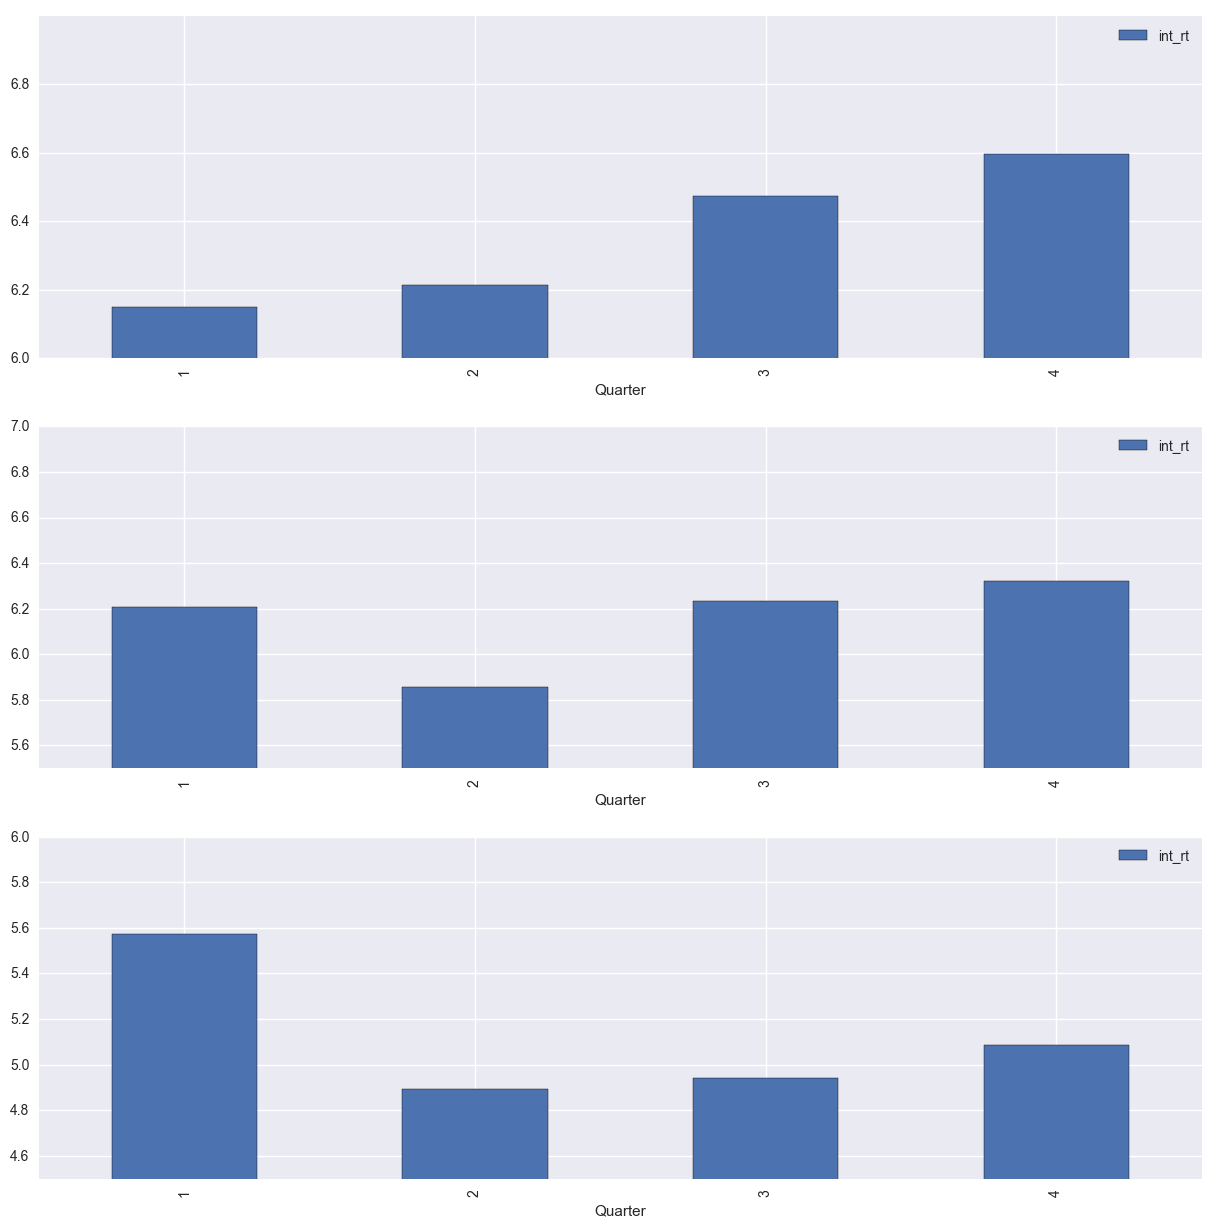

In [213]:
df = ddff.groupby(['year', 'Quarter'])[["int_rt"]].mean()
import matplotlib.pyplot as plt
f, a = plt.subplots(3,1)
f.set_figheight(15)
f.set_figwidth(15)
df.xs(2007).plot(kind='bar',ax=a[0],ylim = [6,7])
df.xs(2008).plot(kind='bar',ax=a[1],ylim = [5.5,7])
df.xs(2009).plot(kind='bar',ax=a[2],ylim = [4.5,6])


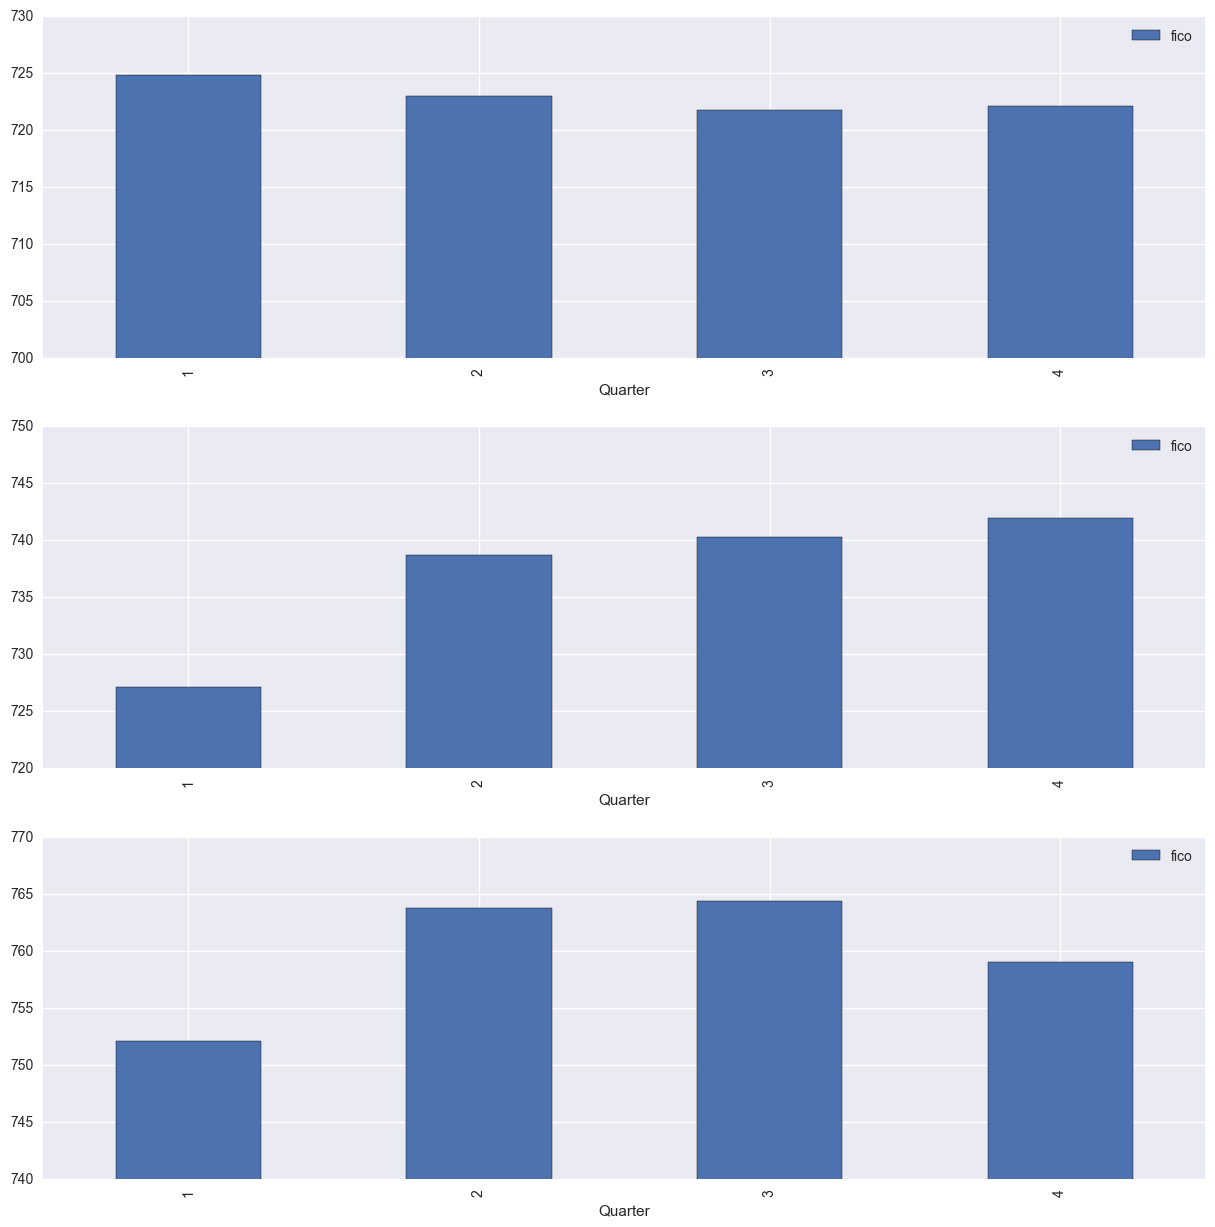

In [208]:
df = ddff.groupby(['year', 'Quarter'])[["fico"]].mean()
import matplotlib.pyplot as plt
f, a = plt.subplots(3,1)
f.set_figheight(15)
f.set_figwidth(15)
seq = [700,730]
df.xs(2007).plot(kind='bar',ax=a[0],ylim = seq)
df.xs(2008).plot(kind='bar',ax=a[1],ylim = [720,750])
df.xs(2009).plot(kind='bar',ax=a[2],ylim = [740,770])


In [ ]:
df = ddff.groupby(['st'])["int_rt"].mean()
df.sort_values().plot(kind='line')

### The maximum interest rate is in Virginia with 6.25% and minimum in Hawaii with 5.56%

In [ ]:
df = ddff.groupby(['st'])["fico"].mean()
df.sort_values().plot(kind='line')

In [239]:
performance_df = pd.read_csv('performance_EDA_files.csv',low_memory=False)


In [241]:
performance_df.shape

(7377106, 24)

In [ ]:
df = performance_df.groupby(['id_loan'])["fico"].mean()

In [228]:
import datetime as DT
import hmac
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

In [236]:
# geolocator = Nominatim()
# ddff['city_coord'] = ddff['st'].apply(geolocator.geocode)

In [245]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()


{"City": "New York", "Density": 34035.48387096774, "HouseOfUnits": 12476, "LandArea": 0.62, "Latitude": 40.75368539999999, "Longitude": -73.9991637, "NEBoundLatitude": 40.8282129, "NEBoundLongitude": -73.9321059, "Population": 21102, "SWBoundLatitude": 40.743451, "SWBoungLongitude": -74.00794499999998, "State": "NY", "TotalWages": 1031960117.0, "WaterArea": 0.0, "Wealthy": 48903.42702113544, "Zipcode": "10001", "ZipcodeType": "Standard"}

In [256]:
dfList = ddff['zipcode'].tolist()


### Method for laveraging the zipcode column which will return the city and state of the zipcode present in the column

In [251]:



def getCityState(zipCode):
# given zip code, return city and state if available
    zipCode = str(zipCode)
    url = "http://www.city-data.com/zips/" + zipCode + ".html"
    r = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data)
    if soup.findAll(text="City:") ==[]:
        cityNeeded = soup.findAll(text="Cities:")
        for t in cityNeeded:
            return t.find_next('a').string

    else:
        cityNeeded = soup.findAll(text="City:")
        for t in cityNeeded:
            return t.find_next('a').string      


In [ ]:
zip_detail = []
for z in dfList:
    zip_detail.append(getCityState(z))

C:\Users\pruth\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\pruth\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [ ]:
res = performance_df.groupby('id_loan')['loan_age'].max().reset_index()
res.columns = ['id_loan', 'loan_age']
res